In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv("/content/drive/MyDrive/2021/2021년 미래기술 챌린지_211002/주문3월.csv")
data = data.dropna(axis = 0, how = 'any')
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,BRAND_NM,ITEM_QTY,ITEM_AMT,IF_YN,ORDER_CRT_DATETIME,DLV_DV,REF_ITEM_SEQ,ORDER_IDX,ORDER_YN,DLVPREARRBRANCD,DLVPREARREMPNICKNM,DLVCLSFCD,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
1,KX007,2021030365922951,KX007210303371080,7,20210303,35521,90001441,20900.0,1,4610261043_2,조합형옵션상품,1,20900.0,N,2.021030e+13,1.0,2021030323885721,2021030323885721,Y,6427,M09,6R67,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,KX007,2021030365924361,KX007210303371081,7,20210303,35513,90001441,37900.0,1,4936599538_1,조합형옵션상품,1,37900.0,N,2.021030e+13,1.0,2021030323887981,2021030323887981,Y,6158,L32,9Y25,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시
3,KX007,2021030365928921,KX007210303371205,7,20210303,35608,90001542,69800.0,1,3858391637_1,조합형옵션상품,1,69800.0,N,2.021030e+13,1.0,2021030323895281,2021030323895281,Y,8909,D21,1N65,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구
4,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,1,4631307460,단일상품,1,39800.0,N,2.021030e+13,1.0,2021030323897651,2021030323897651,Y,2777,R15,3D84,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
5,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,2,2475138283,단일상품,1,15900.0,N,2.021030e+13,1.0,2021030323897661,2021030323897661,Y,2777,R15,3D84,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309344,KX007,2021040163699601,KX007210401807627,7,20210331,234559,90001582,43600.0,1,4789343708_1,조합형옵션상품,1,43600.0,N,2.021033e+13,1.0,2021040124264101,2021040124264101,Y,L21A,M18,6M31,1,iNEXBatch,20210401,174255,38.0,N,경기도,안산시,경상북도,경주시
309345,KX007,2021040163729011,KX007210401807628,7,20210331,234749,90001582,26000.0,1,4624612404_16,조합형옵션상품,1,26000.0,N,2.021033e+13,1.0,2021040124312901,2021040124312901,Y,1877,J16,1P45,3,iNEXBatch,20210401,174255,5.0,N,경기도,안산시,서울특별시,송파구
309346,KX007,2021040163847431,KX007210401807225,7,20210331,235454,90001582,70800.0,1,2012852981_3,조합형옵션상품,1,70800.0,N,2.021033e+13,1.0,2021040124512081,2021040124512081,Y,6114,I73,6N85,0p,iNEXBatch,20210401,174255,49.0,N,경기도,안산시,부산광역시,사하구
309347,KX007,2021040163863411,KX007210401807629,7,20210331,235554,90001582,19500.0,1,161523952_5,조합형옵션상품,1,19500.0,N,2.021033e+13,1.0,2021040124539761,2021040124539761,Y,M53P,G50,6R69,2p,iNEXBatch,20210401,174255,46.0,N,경기도,안산시,부산광역시,북구


In [2]:
col_dic = {'CORP_ID' : '창고코드', 
           'REF_ORD_NO' : '고객 주문번호', 
           'BKG_NO' : 'CJ대한통운 주문번호(예약번호)', 
           'BKG_TYP' : '주문유형',#(7: B2C출고, 8: 정상반출, 9: 불량반출) 
           'BKG_DATE' : '주문날짜',
           'BKG_TIME' : '주문시간',
           'SHPR_CD' : '고객사코드',
           'INV_AMT' : '주문금액',
           'ITEM_SEQ' : '품목순번',
           'ITEM_CD' : '품목코드',
           'BRAND_NM' : '브랜드',
           'ITEM_QTY' : '품목수량',
           'ITEM_AMT' : '품목금액',
           'IF_YN' : '수신여부',
           'ORDER_CRT_DATETIME' : '주문생성시간',
           'DLV_DV' : '택배구분',
           'REF_ITEM_SEQ' : '상품주문번호',
           'ORDER_IDX' : '중개업체 주문번호',
           'ORDER_YN' : '접수여부',
           'DLVPREARRBRANCD' : '배달예정점소코드',
           'DLVPREARREMPNICKNM' : '배달예정사원분류코드',
           'DLVCLSFCD' : '배달터미널코드',
           'DLVSUBCLSFCD' : '배달터미널 소분류코드',
           'INS_ID' : '입력자ID',
           'INS_DATE' : '입력일자(인터페이스 시간)',
           'INS_TIME' : '입력시간(인터페이스 시간)',
           'POST_ZONE' : '권역구분',
           'SPLIT_EXEC_YN' : '배송처별 주문분할여부',
           'SHPR_ADDR_1' : '송화인 주소1',
           'SHPR_ADDR_2' : '송화인 주소2',
           'CNEE_ADDR_1' : '수화인 주소1',
           'CNEE_ADDR_2' : '수화인 주소2'
           }           
data.rename(columns = col_dic, inplace = True)
data

,창고코드,고객 주문번호,CJ대한통운 주문번호(예약번호),주문유형,주문날짜,주문시간,고객사코드,주문금액,품목순번,품목코드,브랜드,품목수량,품목금액,수신여부,주문생성시간,택배구분,상품주문번호,중개업체 주문번호,접수여부,배달예정점소코드,배달예정사원분류코드,배달터미널코드,배달터미널 소분류코드,입력자ID,입력일자(인터페이스 시간),입력시간(인터페이스 시간),권역구분,배송처별 주문분할여부,송화인 주소1,송화인 주소2,수화인 주소1,수화인 주소2
1,KX007,2021030365922951,KX007210303371080,7,20210303,35521,90001441,20900.0,1,4610261043_2,조합형옵션상품,1,20900.0,N,2.021030e+13,1.0,2021030323885721,2021030323885721,Y,6427,M09,6R67,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,KX007,2021030365924361,KX007210303371081,7,20210303,35513,90001441,37900.0,1,4936599538_1,조합형옵션상품,1,37900.0,N,2.021030e+13,1.0,2021030323887981,2021030323887981,Y,6158,L32,9Y25,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시
3,KX007,2021030365928921,KX007210303371205,7,20210303,35608,90001542,69800.0,1,3858391637_1,조합형옵션상품,1,69800.0,N,2.021030e+13,1.0,2021030323895281,2021030323895281,Y,8909,D21,1N65,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구
4,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,1,4631307460,단일상품,1,39800.0,N,2.021030e+13,1.0,2021030323897651,2021030323897651,Y,2777,R15,3D84,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
5,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,2,2475138283,단일상품,1,15900.0,N,2.021030e+13,1.0,2021030323897661,2021030323897661,Y,2777,R15,3D84,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309344,KX007,2021040163699601,KX007210401807627,7,20210331,234559,90001582,43600.0,1,4789343708_1,조합형옵션상품,1,43600.0,N,2.021033e+13,1.0,2021040124264101,2021040124264101,Y,L21A,M18,6M31,1,iNEXBatch,20210401,174255,38.0,N,경기도,안산시,경상북도,경주시
309345,KX007,2021040163729011,KX007210401807628,7,20210331,234749,90001582,26000.0,1,4624612404_16,조합형옵션상품,1,26000.0,N,2.021033e+13,1.0,2021040124312901,2021040124312901,Y,1877,J16,1P45,3,iNEXBatch,20210401,174255,5.0,N,경기도,안산시,서울특별시,송파구
309346,KX007,2021040163847431,KX007210401807225,7,20210331,235454,90001582,70800.0,1,2012852981_3,조합형옵션상품,1,70800.0,N,2.021033e+13,1.0,2021040124512081,2021040124512081,Y,6114,I73,6N85,0p,iNEXBatch,20210401,174255,49.0,N,경기도,안산시,부산광역시,사하구
309347,KX007,2021040163863411,KX007210401807629,7,20210331,235554,90001582,19500.0,1,161523952_5,조합형옵션상품,1,19500.0,N,2.021033e+13,1.0,2021040124539761,2021040124539761,Y,M53P,G50,6R69,2p,iNEXBatch,20210401,174255,46.0,N,경기도,안산시,부산광역시,북구


# 품목수량

In [3]:
data.info(), data.품목수량.describe(), sorted(data.품목수량.unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279851 entries, 1 to 309348
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   창고코드               279851 non-null  object 
 1   고객 주문번호            279851 non-null  object 
 2   CJ대한통운 주문번호(예약번호)  279851 non-null  object 
 3   주문유형               279851 non-null  int64  
 4   주문날짜               279851 non-null  int64  
 5   주문시간               279851 non-null  int64  
 6   고객사코드              279851 non-null  int64  
 7   주문금액               279851 non-null  float64
 8   품목순번               279851 non-null  int64  
 9   품목코드               279851 non-null  object 
 10  브랜드                279851 non-null  object 
 11  품목수량               279851 non-null  int64  
 12  품목금액               279851 non-null  float64
 13  수신여부               279851 non-null  object 
 14  주문생성시간             279851 non-null  float64
 15  택배구분               279851 non-null  float64
 16  상품

(None, count    279851.000000
 mean          1.307206
 std           2.398788
 min           1.000000
 25%           1.000000
 50%           1.000000
 75%           1.000000
 max         510.000000
 Name: 품목수량, dtype: float64, [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  39,
  40,
  45,
  46,
  48,
  50,
  53,
  55,
  56,
  60,
  65,
  70,
  72,
  77,
  80,
  85,
  88,
  90,
  100,
  120,
  138,
  140,
  150,
  180,
  192,
  200,
  240,
  500,
  510])

# 품목코드

In [4]:
code = sorted(data.품목코드.unique())
dic = {}
for c in code:
  dic[c] = sum(data.loc[(data.품목코드 == c)].품목수량) / len(data.loc[(data.품목코드 == c)].품목수량)
dic
## 품목코드별 품목수량의 평균치

{'1001085318': 1.0,
 '1001240388': 1.4,
 '1001284472': 1.15,
 '1001429503': 1.0,
 '1001524487': 1.0,
 '1001524666': 1.0,
 '1001976994': 1.2,
 '1002624602': 1.0,
 '120802614': 1.3333333333333333,
 '120940161': 2.24,
 '120941953_3': 1.1159420289855073,
 '120941953_4': 1.0256410256410255,
 '121015111': 1.0,
 '121015149': 1.0,
 '121016303': 1.0,
 '121016312': 1.0952380952380953,
 '121016322': 1.2857142857142858,
 '121016347_1': 1.0442477876106195,
 '121016535': 2.0,
 '121111509': 1.75,
 '121111522': 1.0,
 '121111556_10': 1.0,
 '121111556_11': 1.1666666666666667,
 '121111556_12': 1.0,
 '121111556_13': 1.2222222222222223,
 '121111556_14': 1.0,
 '121111556_15': 1.0,
 '121111556_16': 1.0,
 '121111556_17': 1.0,
 '121111556_18': 1.0,
 '121111556_19': 1.0,
 '121111556_20': 1.0,
 '121111556_21': 1.0,
 '121111556_22': 1.0,
 '121111556_23': 1.0,
 '121111556_24': 12.0,
 '121111556_25': 1.0,
 '121111556_26': 1.1428571428571428,
 '121111556_27': 1.5,
 '121111556_28': 1.0,
 '121111556_5': 1.333333333333

5320
5320


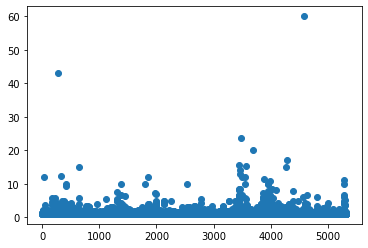

In [5]:
import matplotlib.pyplot as plt

tmp = list(dic.values())
tmp2 = list(dic.keys())
print(len(tmp))
len([i for i in tmp if i > 100])
# for i in [t for t in tmp if t > 100]:
#   tmp2.remove(tmp2[tmp.index(i)])
#   tmp.remove(i)

print(len(tmp))
plt.plot(np.arange(len(tmp)), tmp, 'o')

## 주문 개수가 100이상인 것들을 제외한 품목코드별 수량평균 (100이상인 값이 껴있으면 보기가 힘들어서 . . .)
## 대체적으로 20개 안쪽으로 주문을 하는 것으로 보임
## 많이 주문하는 것의 품명을 알면 납득이 될 수 있겠지만 품명 column이 빠져있어서 코드만으로 어떤 물품인지 알 수 없음..

In [6]:
import seaborn as sns
df = pd.DataFrame(tmp,columns=['평균수량'])
df['품목코드'] = tmp2
df

,평균수량,품목코드
0,1.00,1001085318
1,1.40,1001240388
2,1.15,1001284472
3,1.00,1001429503
4,1.00,1001524487
...,...,...
5315,1.00,735554430_6
5316,1.50,737440835_1
5317,1.00,738499058
5318,1.00,759422245_1


(0.0, 15.0)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_te

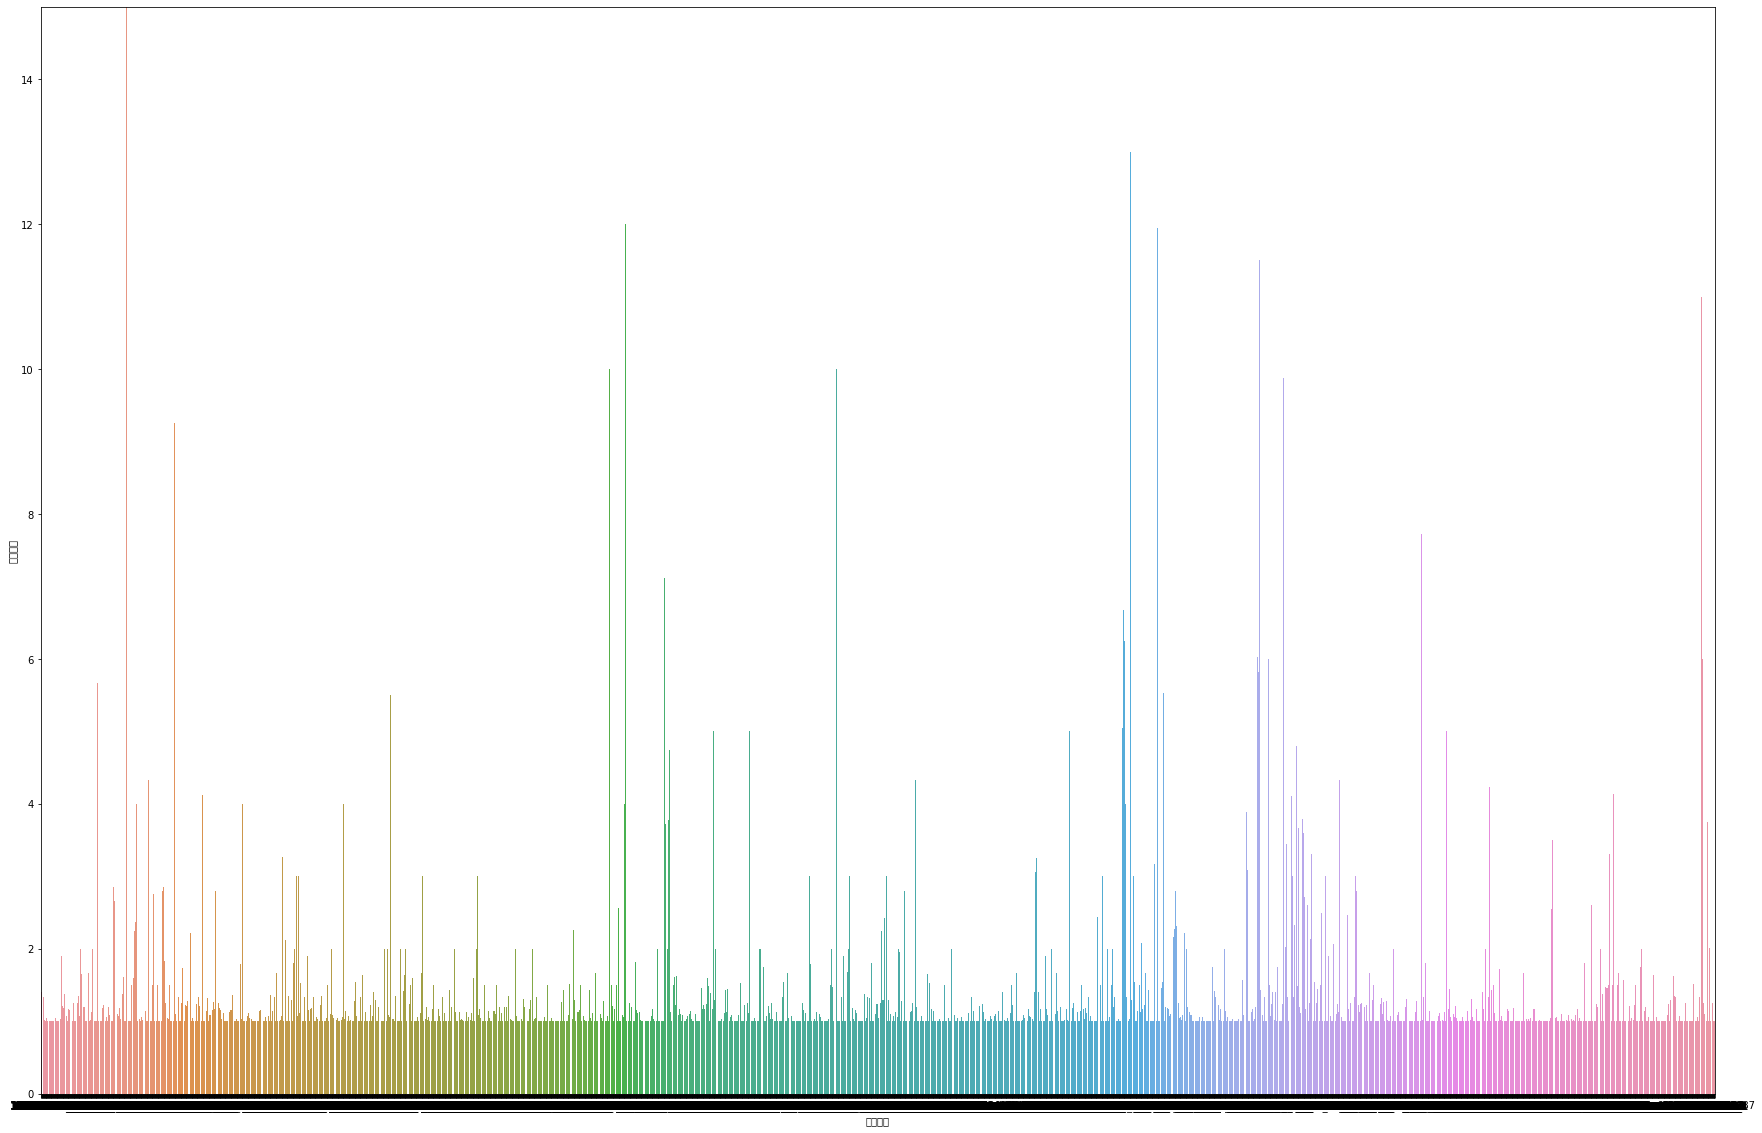

In [7]:
plt.figure(figsize=(30,20))
sns.barplot(
    data= df,
    x= "품목코드",
    y= "평균수량"
)
plt.ylim(0, 15)

## 막대그래프로 보면 품목종류가 너무 많아서 보기 힘들지만 그래도 대체적으로 1.5개 정도씩 주문하는 것으로 판단

In [8]:
date = sorted(data.주문날짜.unique())
date_dic = {}
for d in date:
  date_dic[d] = sum(data.loc[(data.주문날짜 == d)].품목수량) / len(data.loc[(data.주문날짜 == d)].품목수량)
date_dic

## 주문날짜별 수량의 평균치
## 3월 27일이 유독 많은 주문량이 보임

{20210301: 1.2939313315596097,
 20210302: 1.2847399054201527,
 20210303: 1.243664717348928,
 20210304: 1.2588853838065195,
 20210305: 1.1972188139059305,
 20210306: 1.3326794821498626,
 20210307: 1.2922948073701843,
 20210308: 1.4419127988748242,
 20210309: 1.4798423764777204,
 20210310: 1.42623730964467,
 20210311: 1.3157029732556402,
 20210312: 1.415728296403923,
 20210313: 1.3015129682997117,
 20210314: 1.2960120769908166,
 20210315: 1.439879485072583,
 20210316: 1.4406436487638534,
 20210317: 1.4394169450349226,
 20210318: 1.563449206884914,
 20210319: 1.5769996681048788,
 20210320: 1.279035792549306,
 20210321: 1.3257702720123758,
 20210322: 1.1928681721675352,
 20210323: 1.1330420833475545,
 20210324: 1.3745676735070325,
 20210325: 1.3582020389249305,
 20210326: 1.3679255610290093,
 20210327: 1.2569511025886866,
 20210328: 1.2741745283018868,
 20210329: 1.3324341336210772,
 20210330: 1.273939393939394,
 20210331: 1.2922819143365798}

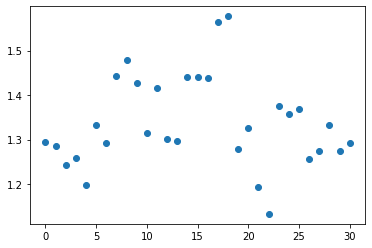

In [9]:
date_per_avg = list(date_dic.values())
order_date = list(date_dic.keys())

plt.plot(np.arange(len(date_per_avg)), date_per_avg, 'o')

In [10]:
df2 = pd.DataFrame(order_date,columns=['주문날짜'])
df2['평균수량'] = date_per_avg
df2

,주문날짜,평균수량
0,20210301,1.293931
1,20210302,1.284740
2,20210303,1.243665
3,20210304,1.258885
4,20210305,1.197219
5,20210306,1.332679
6,20210307,1.292295
7,20210308,1.441913
8,20210309,1.479842
9,20210310,1.426237


(0.0, 15.0)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_te

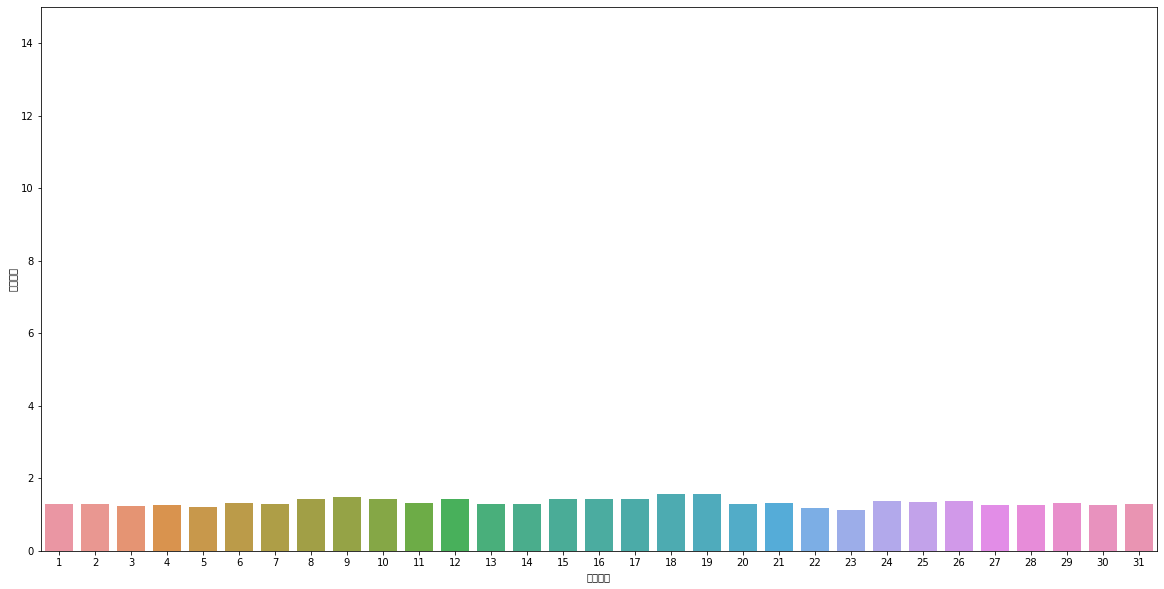

In [11]:
df2.주문날짜 = df2.주문날짜 % 100
plt.figure(figsize=(20,10))
sns.barplot(
    data= df2,
    x= "주문날짜",
    y= "평균수량"
)
plt.ylim(0, 15)

In [19]:
product_per_date = pd.DataFrame(data.loc[(data.품목수량 > 100)].주문날짜,columns=['주문날짜'])
product_per_date['품목코드'] = data.loc[(data.품목수량 > 100)].품목코드
product_per_date['품목수량'] = data.loc[(data.품목수량 > 100)].품목수량
product_per_date

## 5189275561_2, 5102624996, 5102591063, 5102599276 네 가지 품목이 여러번 주문 되었고 해당 품목은 원래 주문량이 100단위인 것으로 판단

,주문날짜,품목코드,품목수량
78462,20210309,5189278114,200
79764,20210308,5189275561_2,200
81073,20210309,5118509252,150
117117,20210315,5176584535,138
125818,20210315,5189275561_2,120
130542,20210316,5426872253,180
134142,20210316,5174762225,120
144415,20210318,5102624996,500
149807,20210318,5102591063,120
154244,20210319,5174765354,192
